<a href="https://colab.research.google.com/github/ArinaPon/LCP_projects_Y6/blob/main/Project_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arina Ponomareva \\
Lorenzo Martinelli \\
Marco Tavis Foster \\
Maria Camila Paris Diaz

Part 1: generate a simulated dataset of  events.

1. Compute the process leading-order cross section, , as a function of the scattering angle  and with the center of mass energy  as a parameter. Start by computing it in the center of mass system. N.B.: textbooks reports such cross section in the relativistic limit, i.e. for , which is clearly not the case here (); LM

In [ ]:
from scipy.constants import alpha, pi
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

np.random.seed(13)

In [ ]:
# Constants
m_mu = 105.66  # muon mass in GeV

# Function to compute the differential cross section as a function of theta and sqrt(s)
def differential_cross_section(theta, sqrt_s):
    s = sqrt_s**2
    prefactor = alpha**2 / (4 * s)
    beta_mu = np.sqrt(1 - (4 * m_mu**2 / s))
    term = (1 + np.cos(theta)**2)
    return prefactor * beta_mu * term

# Total cross section integration over theta, for a given sqrt(s)
def total_cross_section(sqrt_s):
    integral, error = quad(lambda theta: differential_cross_section(theta, sqrt_s) * 2 * pi * np.sin(theta), 0, pi)
    return integral

# Example: Compute the total cross section for sqrt(s) close to the muon production threshold
sqrt_s_example = 230  # Just at the threshold
total_cross_section_example = total_cross_section(sqrt_s_example)

sqrt_s_example, total_cross_section_example


(230, 1.6645659289899073e-09)

In [ ]:
# Define a range of sqrt(s) values slightly above the threshold
sqrt_s_values = np.linspace(2*m_mu, 2*m_mu + 50, 100)  # Up to 50 MeV above threshold

# Compute the total cross section for each sqrt(s) value
total_cross_sections = [total_cross_section(sqrt_s) for sqrt_s in sqrt_s_values]

# Results
sqrt_s_values, total_cross_sections


(array([211.32      , 211.82505051, 212.33010101, 212.83515152,
        213.34020202, 213.84525253, 214.35030303, 214.85535354,
        215.36040404, 215.86545455, 216.37050505, 216.87555556,
        217.38060606, 217.88565657, 218.39070707, 218.89575758,
        219.40080808, 219.90585859, 220.41090909, 220.9159596 ,
        221.4210101 , 221.92606061, 222.43111111, 222.93616162,
        223.44121212, 223.94626263, 224.45131313, 224.95636364,
        225.46141414, 225.96646465, 226.47151515, 226.97656566,
        227.48161616, 227.98666667, 228.49171717, 228.99676768,
        229.50181818, 230.00686869, 230.51191919, 231.0169697 ,
        231.5220202 , 232.02707071, 232.53212121, 233.03717172,
        233.54222222, 234.04727273, 234.55232323, 235.05737374,
        235.56242424, 236.06747475, 236.57252525, 237.07757576,
        237.58262626, 238.08767677, 238.59272727, 239.09777778,
        239.60282828, 240.10787879, 240.61292929, 241.1179798 ,
        241.6230303 , 242.12808081, 242.

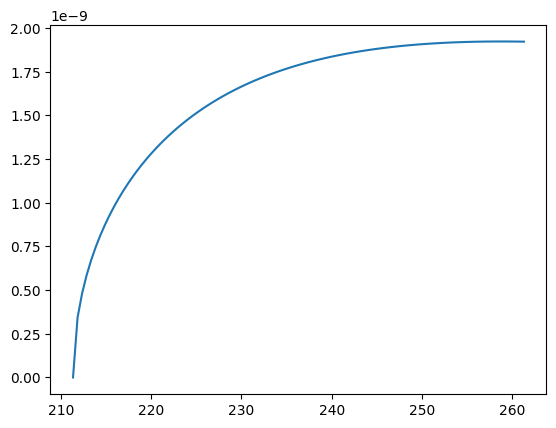

In [ ]:
plt.figure()
plt.plot(sqrt_s_values, total_cross_sections)
plt.show()

# Add some shit to the graph, like title and axes labels

2. Compute and display the angle and momentum components distributions of the emerging muon pairs; MF


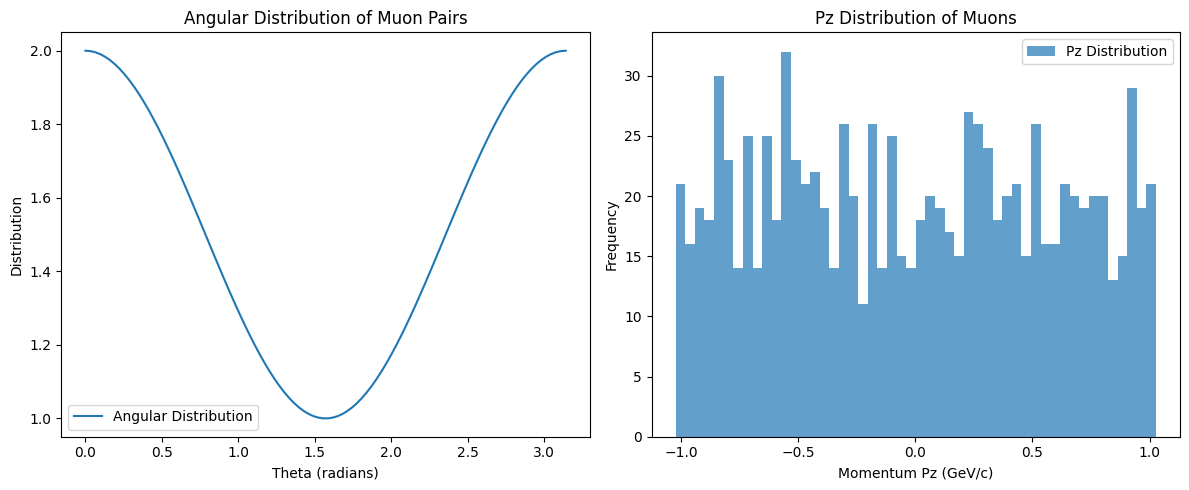

1.0279226624601958

In [ ]:
# Angular distribution visualization
theta_values = np.linspace(0, pi, 100)
angular_distribution = 1 + np.cos(theta_values)**2

# Momentum magnitude calculation for a specific sqrt(s) slightly above threshold
sqrt_s_specific = 2*m_mu + 0.01  # Slightly above threshold to ensure non-zero momentum
p_magnitude = np.sqrt(((sqrt_s_specific / 2)**2 - m_mu**2))

# Visualization of Angular Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(theta_values, angular_distribution, label='Angular Distribution')
plt.xlabel('Theta (radians)')
plt.ylabel('Distribution')
plt.title('Angular Distribution of Muon Pairs')
plt.legend()

# Sample of Momentum Components (assuming isotropic phi distribution)
phi_values = np.random.uniform(0, 2*pi, 1000)
theta_samples = np.arccos(np.random.uniform(-1, 1, 1000))  # Cosine distribution for theta
p_x = p_magnitude * np.sin(theta_samples) * np.cos(phi_values)
p_y = p_magnitude * np.sin(theta_samples) * np.sin(phi_values)
p_z = p_magnitude * np.cos(theta_samples)

plt.subplot(1, 2, 2)
plt.hist(p_z, bins=50, alpha=0.7, label='Pz Distribution')
plt.xlabel('Momentum Pz (GeV/c)')
plt.ylabel('Frequency')
plt.title('Pz Distribution of Muons')
plt.legend()

plt.tight_layout()
plt.show()

p_magnitude


3. Boost muons four-momenta in the laboratory frame, i.e. in the frame where the electron is at rest and the positron has enough energy to give rise to the process; AP



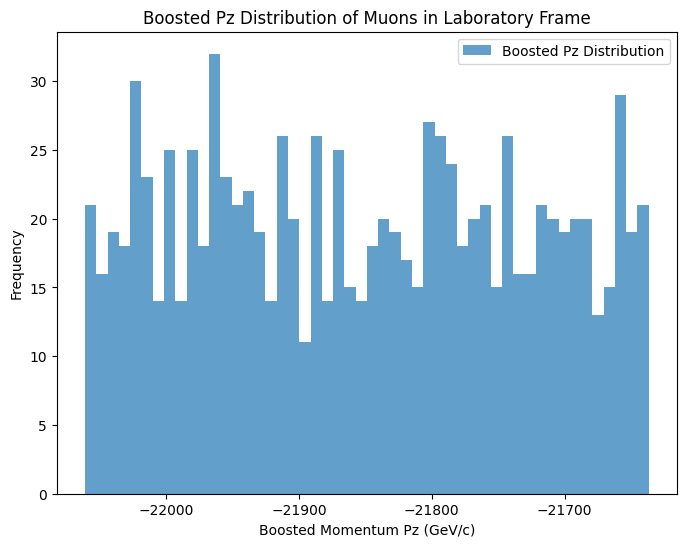

(0.9999883062978128, 206.7808219178082)

In [ ]:
# Constants
#c = 299792458  # Speed of light in m/s
c=1
m_e=0.511
# Assuming the positron has just the right energy for muon production in the center of mass frame
# The boost velocity v is determined by the velocity of the positron in the laboratory frame
# For simplicity, we use the approximation that the total energy in the lab frame is sqrt(s) and solve for v

# Calculate gamma for the given sqrt_s_specific
gamma = sqrt_s_specific / (2 * m_e)

# Calculate the velocity of the center of mass frame relative to the lab frame
v = np.sqrt(1 - 1/gamma**2) * c  # v = c * sqrt(1 - 1/gamma^2)

# Perform the Lorentz boost for the muons' momenta
def lorentz_boost(E, p_x, p_y, p_z, v):
    gamma = 1 / np.sqrt(1 - (v/c)**2)
    E_prime = gamma * (E - v*p_z/c)
    p_z_prime = gamma * (p_z - v*E/c**2)
    return E_prime, p_x, p_y, p_z_prime

# Energies and momenta in the center of mass frame
E_muons_cm = np.sqrt(p_magnitude**2 + m_mu**2)
p_muons_cm = [p_x, p_y, p_z]

# Boost each muon pair
E_prime = []
p_x_prime = []
p_y_prime = []
p_z_prime = []

for i in range(len(p_x)):
    E, px, py, pz = lorentz_boost(E_muons_cm, p_x[i], p_y[i], p_z[i], v)
    E_prime.append(E)
    p_x_prime.append(px)
    p_y_prime.append(py)
    p_z_prime.append(pz)

# Plotting the boosted Pz distribution
plt.figure(figsize=(8, 6))
plt.hist(p_z_prime, bins=50, alpha=0.7, label='Boosted Pz Distribution')
plt.xlabel('Boosted Momentum Pz (GeV/c)')
plt.ylabel('Frequency')
plt.title('Boosted Pz Distribution of Muons in Laboratory Frame')
plt.legend()
plt.show()

v, gamma


4. Write a Monte Carlo simulation that generates scattering events following the distrubtions that you found analytically; CP


In [ ]:
def simulate_scattering_event():
    # Generate random scattering angle theta
    cos_theta = np.random.uniform(-1, 1)
    theta = np.arccos(cos_theta)
    # Generate random azimuthal angle phi
    phi = np.random.uniform(0, 2*pi)
    # Momenta in center of mass frame
    p_x_cm = p_magnitude * np.sin(theta) * np.cos(phi)
    p_y_cm = p_magnitude * np.sin(theta) * np.sin(phi)
    p_z_cm = p_magnitude * np.cos(theta)
    # Energies of muons in center of mass frame
    E_cm = np.sqrt(p_magnitude**2 + m_mu**2)
    # Boost to laboratory frame
    E_plus, px_plus, py_plus, pz_plus = lorentz_boost(E_cm, p_x_cm, p_y_cm, p_z_cm, v)
    E_minus, px_minus, py_minus, pz_minus = lorentz_boost(E_cm, -p_x_cm, -p_y_cm, -p_z_cm, v)
    return E_plus, px_plus, py_plus, pz_plus, E_minus, px_minus, py_minus, pz_minus


5. Produce a synthetic dataset of about  (or more) events. Events should be listed as rows in a file with columns representing the muons coordinates (keep in mind that in the lab frame muons are relativistic and thus the number of coordinates can be only 3 per muon); CP


In [ ]:
# Number of events to generate
N_events = 10**5

# Arrays to store the generated four-momenta in the lab frame
results = []

for _ in range(N_events):
    event = simulate_scattering_event()
    results.append(event)

# Convert results to a structured format (e.g., pandas DataFrame) and save to CSV
import pandas as pd

df = pd.DataFrame(results, columns=['E_muon_plus', 'px_muon_plus', 'py_muon_plus', 'pz_muon_plus',
                                    'E_muon_minus', 'px_muon_minus', 'py_muon_minus', 'pz_muon_minus'])

# Save the DataFrame to a CSV file
file_path = 'muon_scattering_events_separated.csv'
df.to_csv(file_path, index=False)
print(df)

        E_muon_plus  px_muon_plus  py_muon_plus  pz_muon_plus  E_muon_minus  \
0      21850.815098     -0.960952      0.364906 -21850.559612  21848.175998   
1      21763.074262     -0.171227      0.923380 -21762.817750  21935.916834   
2      21722.712561      0.178105     -0.805587 -21722.455576  21976.278535   
3      21776.325891     -0.537866     -0.801318 -21776.069534  21922.665205   
4      21661.243304      0.175856     -0.443690 -21660.985602  22037.747791   
...             ...           ...           ...           ...           ...   
99995  21811.978391     -0.018221      1.011619 -21811.722451  21887.012705   
99996  21860.531695      0.638332      0.803933 -21860.276323  21838.459401   
99997  21969.814351      0.841567     -0.099063 -21969.560257  21729.176745   
99998  21745.988546      0.235551      0.866355 -21745.731834  21953.002550   
99999  21857.553145      0.676587     -0.772875 -21857.297737  21841.437951   

       px_muon_minus  py_muon_minus  pz_muon_minus 

6. Assume a  cm thick Beryllium block is used as target and a rate of positron on target of  Hz. Compute the rescaling factor (weight) you need to apply to the  simulated events such that they represent the statistics that would be gathered in a week of countinuous operations; MF


In [ ]:
# Constants
rate_positron = 1e6  # Hz
time_seconds_per_week = 7 * 24 * 60 * 60  # seconds in a week

# Total positrons hitting the target in a week
total_positrons = rate_positron * time_seconds_per_week

# Number of simulated events
N_simulated = 1e5  # Example: 100,000 simulated events

# Rescaling factor
rescaling_factor = total_positrons / N_simulated

total_positrons, rescaling_factor


(604800000000.0, 6048000.0)

7. Repeat what done so far simulating now the actual transverse shape and energy spread of the beam: for the former assume a flat distribution in a circle of radius  cm and for the latter a gaussian distribution centered at the nominal beam energy and a width of  GeV; LM


In [ ]:
# Constants for simulation
E_0 = 2 * m_mu  # Nominal beam energy, for example purposes, set to twice the muon mass
sigma_E = 0.5  # GeV, energy spread of the beam
# Function to simulate scattering event with beam characteristics
def simulate_scattering_event_with_beam_characteristics():
    # Transverse position within a circle of radius 1 cm
    theta = np.random.uniform(0, 2*pi)
    r = np.sqrt(np.random.uniform(0, 1)) * 1  # Radius in cm
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Adjusting energy for the Gaussian spread
    E_beam = np.random.normal(E_0, sigma_E)
    # This affects the sqrt(s) calculation, but for simplicity, we'll not adjust sqrt(s) dynamically in this example

    # Generate random scattering angles
    cos_theta = np.random.uniform(-1, 1)
    theta = np.arccos(cos_theta)
    phi = np.random.uniform(0, 2*pi)

    # Calculate momenta in center of mass frame
    p_x_cm = p_magnitude * np.sin(theta) * np.cos(phi)
    p_y_cm = p_magnitude * np.sin(theta) * np.sin(phi)
    p_z_cm = p_magnitude * np.cos(theta)

    # Energies of muons in center of mass frame
    E_cm = np.sqrt(p_magnitude**2 + m_mu**2)

    # Boost to laboratory frame
    E_plus, px_plus, py_plus, pz_plus = lorentz_boost(E_cm, p_x_cm, p_y_cm, p_z_cm, v)
    E_minus, px_minus, py_minus, pz_minus = lorentz_boost(E_cm, -p_x_cm, -p_y_cm, -p_z_cm, v)

    return E_plus, px_plus, py_plus, pz_plus, E_minus, px_minus, py_minus, pz_minus, x, y

# Simulate N events
N_events = 100000
events = [simulate_scattering_event_with_beam_characteristics() for _ in range(N_events)]

# Convert to DataFrame for easier manipulation and visualization
columns = ['E_muon_plus', 'px_muon_plus', 'py_muon_plus', 'pz_muon_plus',
           'E_muon_minus', 'px_muon_minus', 'py_muon_minus', 'pz_muon_minus', 'x', 'y']
df_events = pd.DataFrame(events, columns=columns)

# Example: Display the first few rows to verify
print(df_events.head())

    E_muon_plus  px_muon_plus  py_muon_plus  pz_muon_plus  E_muon_minus  \
0  21715.607330     -0.787670      0.130192 -21715.350263  21983.383765   
1  21989.635198      0.272360      0.723277 -21989.381336  21709.355897   
2  21870.029159      0.278549     -0.984467 -21869.773897  21828.961937   
3  22002.342165      0.710613     -0.072567 -22002.088451  21696.648931   
4  21936.757963      0.921436     -0.171725 -21936.503482  21762.233132   

   px_muon_minus  py_muon_minus  pz_muon_minus         x         y  
0       0.787670      -0.130192  -21983.129830 -0.428389 -0.016854  
1      -0.272360      -0.723277  -21709.098757 -0.597375 -0.304449  
2      -0.278549       0.984467  -21828.706195  0.228059 -0.463636  
3      -0.710613       0.072567  -21696.391642 -0.430586 -0.776606  
4      -0.921436       0.171725  -21761.976610  0.144676 -0.641288  


In [ ]:
import numpy as np
import pandas as pd
from scipy.constants import alpha, pi, c
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
m_e = 0.511  # MeV
m_mu = 0.1056583755  # GeV
#E_0 = 2 * m_mu  # GeV, nominal beam energy
E_0=50
sigma_E = 0.5  # GeV, energy spread of the beam

# Adjust constants for units, if needed
m_e_GeV = m_e / 1000  # Convert electron mass to GeV
def lorentz_boost(E, p_x, p_y, p_z, v):
    gamma = 1 / np.sqrt(1 - (v/c)**2)
    E_prime = gamma * (E - v*p_z/c)
    p_z_prime = gamma * (p_z - v*E/c**2)
    return E_prime, p_x, p_y, p_z_prime

def simulate_scattering_event_with_beam_characteristics():
    # Transverse position within a circle of radius 1 cm
    theta = np.random.uniform(0, 2*np.pi)
    r = np.sqrt(np.random.uniform(0, 1)) * 1  # Radius in cm
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Adjusting energy for the Gaussian spread
    E_beam = np.random.normal(E_0, sigma_E)  # Beam energy for this event

    # Recalculate sqrt(s) dynamically for each event
    sqrt_s = np.sqrt(2*m_e_GeV*(E_beam + m_e_GeV) + 2*E_beam*m_e_GeV)

    # Assuming p_magnitude and other calculations would be adjusted based on new sqrt(s)
    # For demonstration, we'll proceed with placeholders for these values
    # p_magnitude, etc., would be functions of sqrt_s, E_beam, m_mu

    # Placeholder for actual dynamics calculation (e.g., scattering angles, momenta)
    # This is where you'd include calculations that depend on the updated sqrt_s

    # For simplicity, placeholders for momenta components and energies
    p_x_cm, p_y_cm, p_z_cm, E_cm = 0, 0, 0, 0  # Placeholder values

    # Boost to laboratory frame using placeholders for demonstration
    E_plus, px_plus, py_plus, pz_plus = lorentz_boost(E_cm, p_x_cm, p_y_cm, p_z_cm, v)
    E_minus, px_minus, py_minus, pz_minus = lorentz_boost(E_cm, -p_x_cm, -p_y_cm, -p_z_cm, v)

    return E_plus, px_plus, py_plus, pz_plus, E_minus, px_minus, py_minus, pz_minus, x, y

# Simulate N events
N_events = 100000
events = []

for _ in range(N_events):
    event = simulate_scattering_event_with_beam_characteristics()
    events.append(event)

# Convert the list of events to a pandas DataFrame for easier manipulation and visualization
columns = ['E_muon_plus', 'px_muon_plus', 'py_muon_plus', 'pz_muon_plus',
           'E_muon_minus', 'px_muon_minus', 'py_muon_minus', 'pz_muon_minus', 'x', 'y']
df_events = pd.DataFrame(events, columns=columns)

# Display the first few rows to verify the structure and data
print(df_events.head())

   E_muon_plus  px_muon_plus  py_muon_plus  pz_muon_plus  E_muon_minus  \
0          0.0             0             0           0.0           0.0   
1          0.0             0             0           0.0           0.0   
2          0.0             0             0           0.0           0.0   
3          0.0             0             0           0.0           0.0   
4          0.0             0             0           0.0           0.0   

   px_muon_minus  py_muon_minus  pz_muon_minus         x         y  
0              0              0            0.0 -0.301917 -0.609250  
1              0              0            0.0 -0.828960  0.035913  
2              0              0            0.0 -0.376250  0.348688  
3              0              0            0.0 -0.074951 -0.265592  
4              0              0            0.0 -0.193544 -0.064250  


8. Given that the electrons traversing the target lose energy as  (with z the longitudinal coordinate of the target, the one parallel to the beam direction and  is the Beryllium radiation length), compute the nominal beam energy  such that muon pairs can be generated along the whole length of the target; AP

In [ ]:
# Constants
m_mu_c2 = 105.66e-3  # Muon mass in GeV/c^2
X_0 = 35.3  # Radiation length of Beryllium in cm
target_thickness = 3  # Thickness of the Beryllium target in cm

# Calculate E_0
E_0 = 2 * m_mu_c2 * np.exp(target_thickness / X_0)

E_0


0.23006443180862673

(optional) take the former point into account when generating the events (i.e. the proccess  depend on the position along the target where the  scattering occurrs. CP

# Different code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from scipy.integrate import quad
from scipy.constants import alpha, pi
from scipy.interpolate import interp1d
from typing import Tuple

np.random.seed(13)

## Item 1

In [ ]:
# Reference for cross section: https://www.physics.usu.edu/Wheeler/QFT/PicsII/QFT10Feb23Muon.pdf
# Masses of the particles (in MeV)
m_e = 0.51099895000
m_mu = 105.6583755

# Squared masses (in MeV^2, useful for calculations)
e2 = m_e**2
mu2 = m_mu**2

def diff_X_sec(ECM: float, theta: float) -> float:
    '''
    This function computes the differential cross section starting from the energy of the center of mass
    (generally represented as sqrt(s)) and the angle theta.
    The cross section computed here is returned in natural units (i.e.: MeV**-2)
    Arguments:
    * ECM: energy of the center of mass
    * theta: scattering angle
    '''
    s = ECM ** 2
    prefactor = alpha**2 / (4 * s)
    ratio = np.sqrt(1 - (4 * mu2 / s))/np.sqrt(1 - (4 * e2 / s))
    term = 1 + 4 / s * (e2 + mu2) + ((1 - 4 * mu2 / s) * (1 - 4 * e2 / s) * (np.cos(theta) ** 2))
    diff_X = prefactor * ratio * term
    return diff_X

def total_X_sec(ECM: float) -> float:
    '''
    This function computes the total cross section starting from a given value of the energy of the center of
    mass.
    Again, the results computed here are returned in natural units (i.e.: MeV**-2)
    Argument:
    * ECM: energy of the center of mass
    '''
    total_X, _ = quad(lambda theta: diff_X_sec(ECM, theta) * 2 * pi * np.sin(theta), 0, pi)
    return total_X

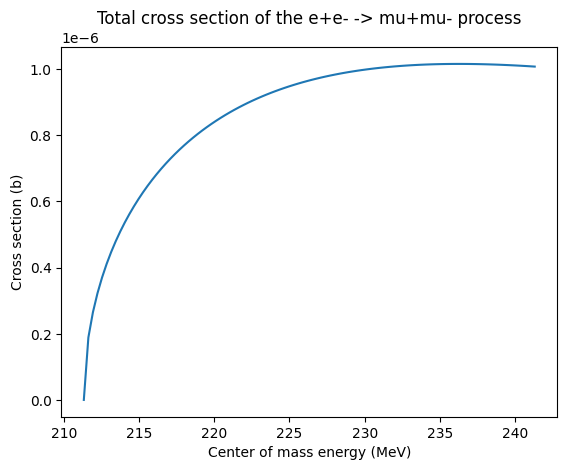

In [ ]:
# Plotting the total cross section vs. energy
# Defining an energy domain over which compute the cross section
# The energy in this case is ECM, so it should be slightly above 2 * muon mass
e_domain = np.linspace(2 * m_mu, 2 * m_mu + 30, 100)

X_secs = []
for energy in e_domain:
    X_secs.append(total_X_sec(energy))

X_secs = np.array(X_secs)

# Perhaps plotting the cross section in barns instead of MeV might be more common. Therefore, we define a
# conversion factor, remembering how 1 barn = 0.00257 MeV^-2
conv = 0.00257

X_secs = X_secs / conv

# Plotting the total cross section
plt.figure()
plt.title('Total cross section of the e+e- -> mu+mu- process')
plt.plot(e_domain, X_secs)
plt.xlabel('Center of mass energy (MeV)')
plt.ylabel('Cross section (b)')
plt.show()

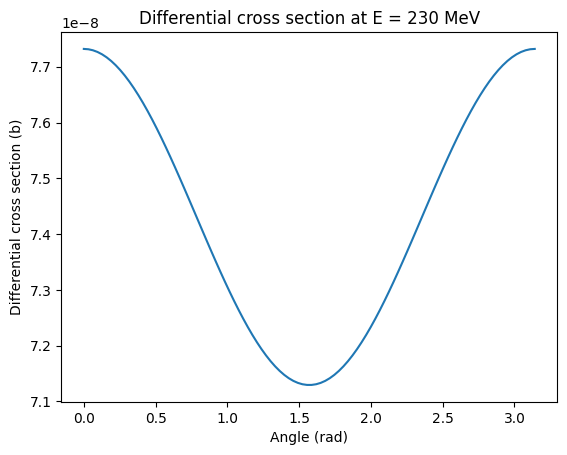

In [ ]:
# Plotting the differential cross section as well.
# Plotting it at fixed energy
fix_E = 230         # in MeV, reasonably close to the threshold of mu-mu production
theta_domain = np.linspace(0, pi, 100)
diff_Xs = []
for theta in theta_domain:
    diff_Xs.append(diff_X_sec(fix_E, theta))
diff_Xs = np.array(diff_Xs)
diff_Xs = diff_Xs / conv

plt.figure()
plt.title('Differential cross section at E = 230 MeV')
plt.plot(theta_domain, diff_Xs)
plt.xlabel('Angle (rad)')
plt.ylabel('Differential cross section (b)')
plt.show()

## Item 2

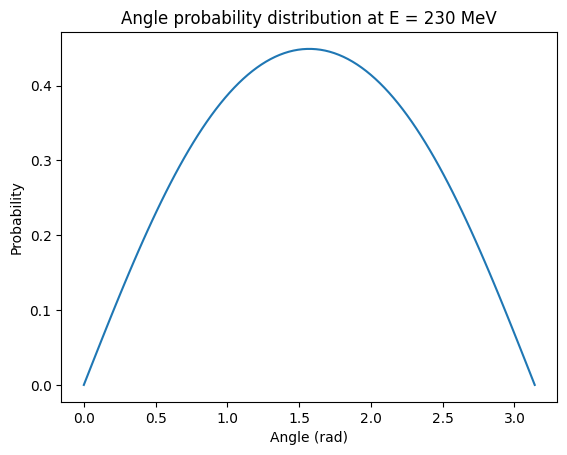

In [ ]:
def angle_probability(ECM: float, theta: float) -> float:
    '''
    This function evaluates the probability of the emerging muon pair's angle,
    given the energy in the center of mass frame of reference.
    Arguments:
    * ECM: energy in the center of mass
    * theta: angle
    '''
    return 2 * pi * np.sin(theta) / total_X_sec(ECM) * diff_X_sec(ECM, theta)

probs = []
for theta in theta_domain:
    probs.append(angle_probability(fix_E, theta))

probs = np.array(probs)

# Plotting the angle distribution at a fixed energy fix_E = 230 MeV
plt.figure()
plt.title('Angle probability distribution at E = 230 MeV')
plt.plot(theta_domain, probs)
plt.xlabel('Angle (rad)')
plt.ylabel('Probability')
plt.show()

In [ ]:
# Let's check if the PDF we computed is normalized at 1 by using a simple Monte Carlo integration routine
N = 10000
hits = 0
for i in range(N):
    x = pi * np.random.uniform(0, 1)
    y = np.random.uniform(0, 1)
    if angle_probability(fix_E, x) > y: hits += 1

intg = hits * pi / N
print('Integral of the probability distribution of the angle:', intg)

Integral of the probability distribution of the angle: 0.9597565556716818


In [ ]:
# In order to obtain a set of angles distributed according to the pdf we computed, we can use the inverse
# transform method.
def cumulative_distr(ECM: float, theta_values: np.array) -> np.array:
    pdf_values = [angle_probability(ECM, theta) for theta in theta_values]
    cdf_values = np.cumsum(pdf_values)
    cdf_values /= cdf_values[-1]
    return cdf_values

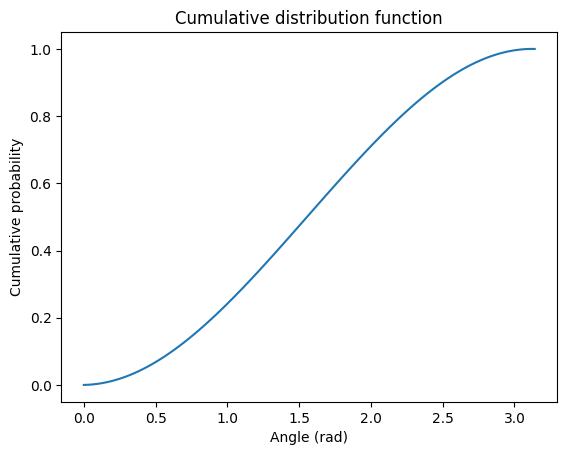

In [ ]:
# Let's see if the cumulative distribution is actually sound
distribution = cumulative_distr(fix_E, theta_domain)

plt.figure()
plt.title('Cumulative distribution function')
plt.plot(theta_domain, distribution)
plt.xlabel('Angle (rad)')
plt.ylabel('Cumulative probability')
plt.show()

Text(0, 0.5, 'Frequency')

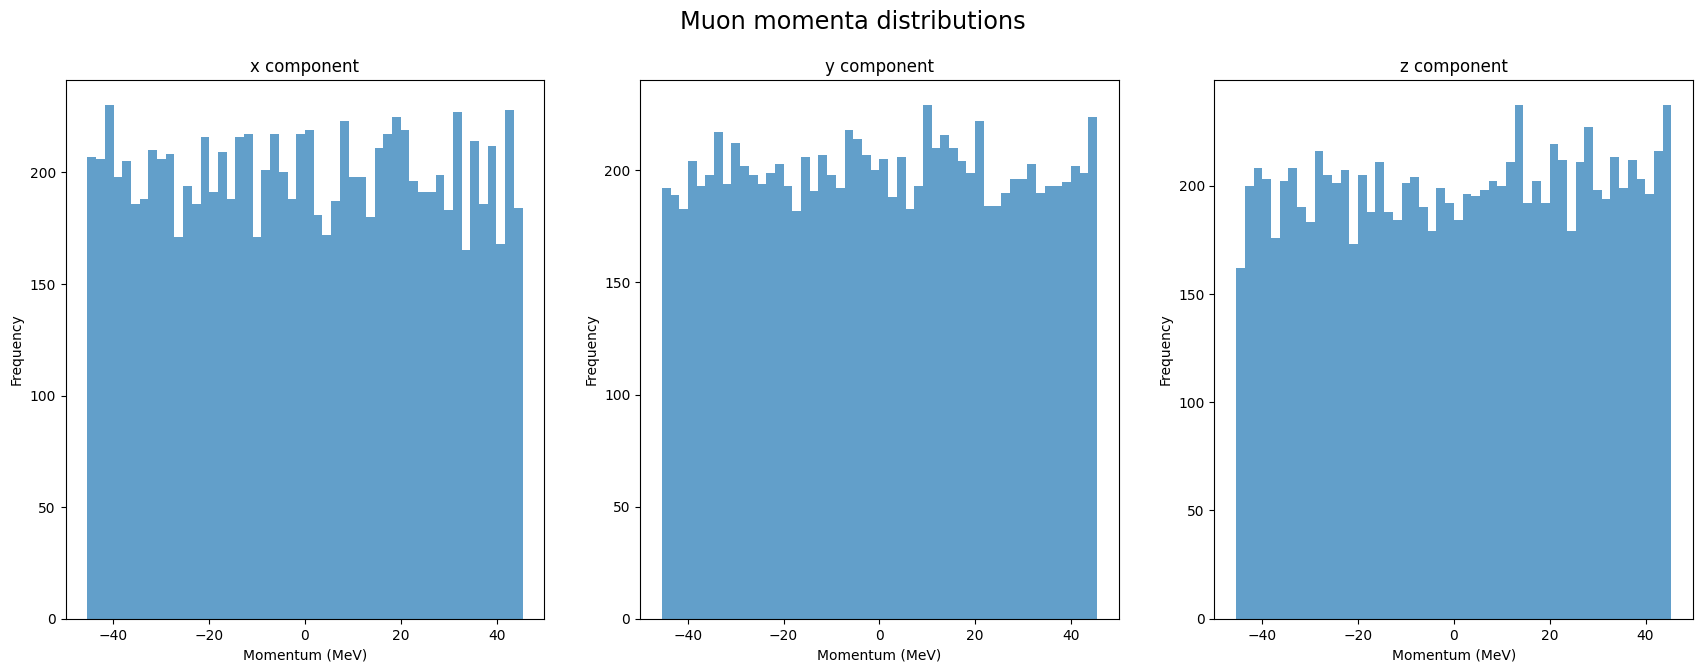

In [ ]:
# Now we have to compute the distribution of momentum components.
# I may have an idea of what to do with this.
# Remembering the energy-mass-momentum relation (in natural units, p = sqrt(E2 - m2)), we compute
# the modulus of the momentum given the energy. Then we will have to project that modulus into the three
# space directions x, y, and z, assuming a uniform distribution over the angle phi

momentum = np.sqrt((fix_E / 2) ** 2 - (m_mu**2))

N = 10000
phi_values = np.random.uniform(0, 2 * pi, N)
#theta_values = generate_samples(fix_E, theta_domain, N)
# With the icdf method, we can generate a large amount of scattering angles and see if they follow
# the expected distribution
def generateTheta(N: int, ECM: float) -> np.array:
    '''
    This function generates a series of events using the icdf method
    Arguments:
    * N: number of events we want to generate
    * ECM: energy of the center of mass
    '''
    theta = np.linspace(0, pi, 100)
    CDF = cumulative_distr(ECM, theta)
    predictor = interp1d(CDF, theta, kind = 'linear')
    out = []
    for x in np.random.uniform(min(CDF), max(CDF), N):
        out.append(float(predictor(x)))
    out = np.array(out)
    return out

samples = int(1e5)

simul1 = generateTheta(samples, fix_E)
theta_values=generateTheta(N, fix_E)
p_x = momentum * np.sin(theta_values) * np.cos(phi_values)
p_y = momentum * np.sin(theta_values) * np.sin(phi_values)
p_z = momentum * np.cos(theta_values)

# Now, let's plot the three distributions
fig, ax = plt.subplots(1, 3, figsize = (21, 7))
fig.suptitle('Muon momenta distributions', size = 'xx-large')

ax[0].hist(np.sort(p_x), bins = 50, alpha = .7)
ax[0].set_title('x component')
ax[0].set_xlabel('Momentum (MeV)')
ax[0].set_ylabel('Frequency')

ax[1].hist(np.sort(p_y), bins = 50, alpha = .7)
ax[1].set_title('y component')
ax[1].set_xlabel('Momentum (MeV)')
ax[1].set_ylabel('Frequency')

ax[2].hist(np.sort(p_z), bins = 50, alpha = .7)
ax[2].set_title('z component')
ax[2].set_xlabel('Momentum (MeV)')
ax[2].set_ylabel('Frequency')

Expected total momentum: 45.401626476382965 MeV


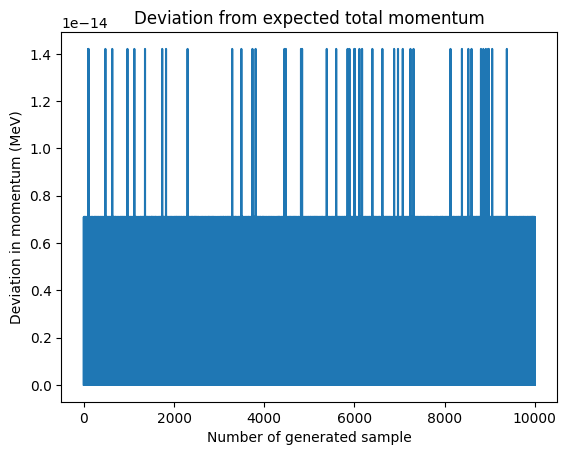

In [ ]:
# Let's also verify that the three components are all on-shell
tot_p = np.sqrt((p_x ** 2) + (p_y ** 2) + (p_z ** 2))

print('Expected total momentum: {} MeV'.format(momentum))

plt.figure()
plt.title('Deviation from expected total momentum')
plt.plot(np.arange(N), np.abs(momentum - tot_p))
plt.xlabel('Number of generated sample')
plt.ylabel('Deviation in momentum (MeV)')
plt.show()

In [ ]:
# With the icdf method, we can generate a large amount of scattering angles and see if they follow
# the expected distribution
def generateTheta(N: int, ECM: float) -> np.array:
    '''
    This function generates a series of events using the icdf method
    Arguments:
    * N: number of events we want to generate
    * ECM: energy of the center of mass
    '''
    theta = np.linspace(0, pi, 100)
    CDF = cumulative_distr(ECM, theta)
    predictor = interp1d(CDF, theta, kind = 'linear')
    out = []
    for x in np.random.uniform(min(CDF), max(CDF), N):
        out.append(float(predictor(x)))
    out = np.array(out)
    return out

samples = int(1e5)

simul1 = generateTheta(samples, fix_E)

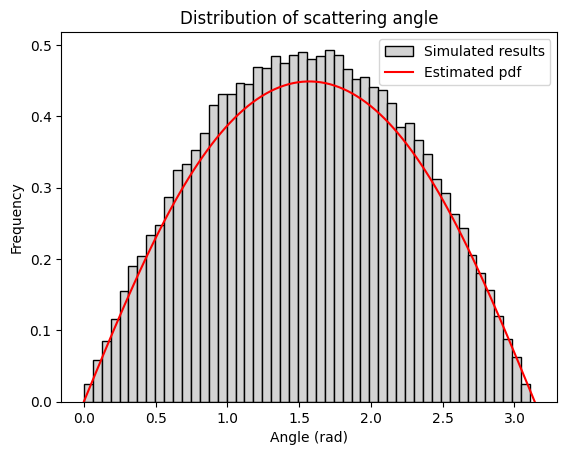

In [ ]:
# Plotting the results
plt.figure()
plt.title('Distribution of scattering angle')
plt.hist(np.sort(simul1), bins = 50, color = 'lightgray', label = 'Simulated results', density = True,
         edgecolor = 'black')
plt.plot(theta_domain, probs, color = 'red', label = 'Estimated pdf')
plt.xlabel('Angle (rad)')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
plt.show()

## Item 3

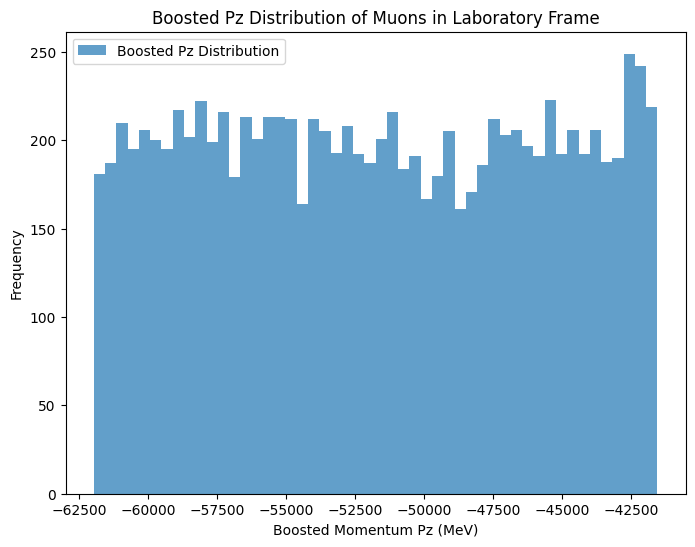

(225.0493861093061, 0.9999901277423128)

In [ ]:
gamma = fix_E / (2 * m_e)

def lorentz_boost(E: float, px: float, py: float, pz: float, gamma: float) -> np.array:
    '''
    Computes Lorentz-transformed variables using the expressions contained in [3], as well as the velocity
    (in natural units)
    Parameters:
    * E: energy
    * px, py: 1st and 2nd component of the momentum 3-vector. By design of the experiment, they're the x and y
              components. They are not changed in the Lorentz transformation, but they are included in this
              function just to make it simpler due to the way arrays are formatted
    * pz: 3rd component of the momentum 3-vector. By design of the experiment, it's the z component and it's the
          only one that is changed by the Lorentz transformation
    * gamma: Lorentz gamma parameter
    '''
    v = np.sqrt(1 - 1 / gamma ** 2)
    E_prime = gamma * (E - pz * v)
    pz_prime = gamma * (pz - E * v)
    return E_prime, px, py, pz_prime, v

E_muons_cm = np.sqrt(momentum**2 + m_mu**2)
p_muons_cm = [p_x, p_y, p_z]

E_prime = []
p_x_prime = []
p_y_prime = []
p_z_prime = []

for i in range(len(p_x)):
    E, px, py, pz, v = lorentz_boost(fix_E, p_x[i], p_y[i], p_z[i], gamma)
    E_prime.append(E)
    p_x_prime.append(px)
    p_y_prime.append(py)
    p_z_prime.append(pz)

E_prime = np.array(E_prime)
p_x_prime = np.array(p_x_prime)
p_y_prime = np.array(p_y_prime)
p_z_prime = np.array(p_z_prime)

# Plotting the boosted Pz distribution
plt.figure(figsize=(8, 6))
plt.hist(p_z_prime, bins=50, alpha=0.7, label='Boosted Pz Distribution')
plt.xlabel('Boosted Momentum Pz (MeV)')
plt.ylabel('Frequency')
plt.title('Boosted Pz Distribution of Muons in Laboratory Frame')
plt.legend()
plt.show()

# The other two components of the momentum remain the same
gamma, v

## Item 4 (unchanged)

In [ ]:
def simulate_scattering_event():
    # Generate scattering angle theta according to the distribution we have previously found
    theta = generateTheta(1, fix_E)
    # Generate random azimuthal angle phi
    phi = np.random.uniform(0, 2*pi)
    # Momenta in center of mass frame
    p_x_cm = momentum * np.sin(theta) * np.cos(phi)
    p_y_cm = momentum * np.sin(theta) * np.sin(phi)
    p_z_cm = momentum * np.cos(theta)
    # Energies of muons in center of mass frame
    E_cm = np.sqrt(momentum**2 + m_mu**2)
    # Boost to laboratory frame
    E_plus, px_plus, py_plus, pz_plus, _ = lorentz_boost(E_cm, p_x_cm, p_y_cm, p_z_cm, gamma)
    E_minus, px_minus, py_minus, pz_minus, _ = lorentz_boost(E_cm, -p_x_cm, -p_y_cm, -p_z_cm, gamma)
    return E_plus, px_plus, py_plus, pz_plus, E_minus, px_minus, py_minus, pz_minus

## Item 5 (unchanged) TEMPORARILY USES 50 EVENTS TO MAKE RUNTIME FASTER

In [ ]:
# Number of events to generate
N_events = int(50)

# Arrays to store the generated four-momenta in the lab frame
results = []

for i in range(N_events):
    event = simulate_scattering_event()
    results.append(event)

# Convert results to a structured format (e.g., pandas DataFrame) and save to CSV

df = pd.DataFrame(results, columns=['E_muon_plus', 'px_muon_plus', 'py_muon_plus', 'pz_muon_plus',
                                    'E_muon_minus', 'px_muon_minus', 'py_muon_minus', 'pz_muon_minus'])

# Save the DataFrame to a CSV file
# file_path = 'muon_scattering_events_separated.csv'
# df.to_csv(file_path, index=False)

In [ ]:
df.head()

,E_muon_plus,px_muon_plus,py_muon_plus,pz_muon_plus,E_muon_minus,px_muon_minus,py_muon_minus,pz_muon_minus
0,[23309.175192273717],[-43.50009057438811],[-6.203597463472234],[-23308.8943047347],[28452.18361286669],[43.50009057438811],[6.203597463472234],[-28451.95349893334]
1,[33689.62807068513],[-22.163918168501173],[19.13207706645288],[-33689.449662663545],[18071.730734455276],[22.163918168501173],[-19.13207706645288],[-18071.398141004494]
2,[20827.975588053807],[-5.904509379717151],[-39.01747236506307],[-20827.6702052311],[30933.3832170866],[5.904509379717151],[39.01747236506307],[-30933.177598436938]
3,[27378.40188067749],[-19.46628636490739],[40.473205576917294],[-27378.161165989524],[24382.956924462917],[19.46628636490739],[-40.473205576917294],[-24382.686637678515]
4,[23322.863091310533],[43.61398754388197],[-5.472555844305988],[-23322.582338903318],[28438.495713829874],[-43.61398754388197],[5.472555844305988],[-28438.26546476472]


## Item 6
## PROBABILY NEEDS RELATIVISTIC CORRECTIONS: IN CENTER OF MASS FRAME OF REFERENCE, THE TARGET IS NOT 3 CM THICK (right?)

In [ ]:
# Now we have to figure out how to deal with the Beryllium.

# First, we define the constants
rate_positrons = int(1e6)       # Rate of positron [Hz]
thickness = 3                   # thickness of Beryllium [cm]
T = 7 * 24 * 60 * 60            # Time of exposure [s]
NA = 6.022 * (10 ** 23)         # Avogadro constant [1/mol]
Z = 4                           # Atomic number of Beryllium
rho = 1.848                     # Density of Beryllium [g/cm^3]
M = 9.012                       # Molar mass of Beryllium [g/mol]
N0 = int(3 * 1e6)                   # Previous number

X_sec = total_X_sec(fix_E) / conv * 1e-24    # cross section in cm^2
print('Cross section: {} cm^2 (for energy in the CoM frame equal to {} MeV)'.format(X_sec, fix_E))

scale_factor = X_sec * thickness * rate_positrons * T * NA * Z * rho / (M * N0)
print('The scale factor (considering an initial number of events given by {}) is {}'.format(N0, scale_factor))

Cross section: 9.211554167401665e-31 cm^2 (for energy in the CoM frame equal to 230 MeV)
The scale factor (considering an initial number of events given by 3000000) is 0.2751859262178817


## Item 7 THERE IS DEFINITELY SOME ROOM FOR IMPROVEMENT WITH THESE FUNCTIONS

In [ ]:
# WE ASSUMED THAT THE WIDTH OF THE BEAM IS THE FWHM!

fix_E = 230   # Total energy in the CoM frame, [MeV]
E_beam = fix_E ** 2 / (2 * m_e) / 1000   # Nominal energy of the beam from the total energy in the CoM frame, [GeV]
FWHM = 0.5    # Full width ad half maximum of the energy of the beam, [GeV]
radius = 1    # Radius of the beam, [cm]

# Standard deviation
STD = FWHM / (2 * np.sqrt(2 * np.log(2)))

E_beam, STD

(51.76135880514041, 0.21233045007200477)

In [ ]:
# Energies of the positrons in the LAB frame
E_lab = np.random.normal(loc = E_beam, scale = STD, size = int(1e5))

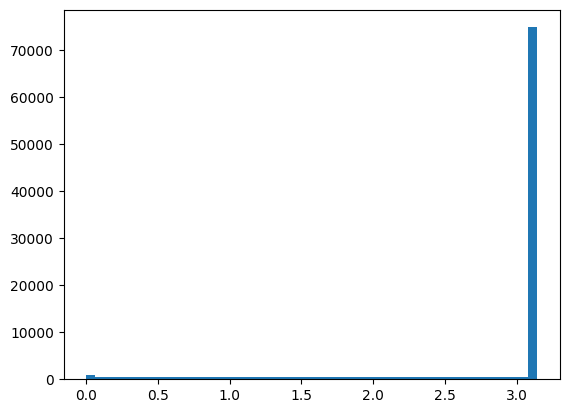

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

def diff_X_sec_vectorized(ECM, theta):
    '''
    Vectorized version to compute the differential cross section for arrays of ECM and theta.
    '''
    s = ECM**2
    prefactor = alpha**2 / (4 * s)
    ratio = np.sqrt(1 - (4 * mu2 / s)) / np.sqrt(1 - (4 * e2 / s))
    term = 1 + (4 / s) * (e2 + mu2) + ((1 - (4 * mu2 / s)) * (1 - (4 * e2 / s)) * np.cos(theta)**2)
    diff_X = prefactor * ratio * term
    return diff_X
from scipy.integrate import quad

def total_X_sec_vectorized(ECM):
    '''
    This function computes the total cross section for each ECM value in the input array.
    It leverages the vectorized diff_X_sec function for the integrand.
    '''
    total_X = np.zeros_like(ECM)
    for i, ecm in np.ndenumerate(ECM):
        integrand = lambda theta: diff_X_sec_vectorized(ecm, theta) * 2 * np.pi * np.sin(theta)
        total_X[i], _ = quad(integrand, 0, np.pi)
    return total_X

def generateTheta_normal_optimized(E_lab: np.array) -> np.array:
    ECM = E_lab / gamma * 1000
    theta = np.linspace(0, np.pi, 100)

    # Pre-compute differential cross sections for a range of ECM and theta
    diff_X = diff_X_sec_vectorized(ECM[:, None], theta)  # ECM[:, None] makes ECM 2D for broadcasting

    # Compute total cross section for each ECM
    total_X = total_X_sec_vectorized(ECM)

    # Calculate PDF values for each combination of ECM and theta
    pdf_values = diff_X / total_X[:, None]  # Normalize by total cross section

    # Compute CDF values from PDF values
    cdf_values = np.cumsum(pdf_values * np.gradient(theta), axis=1)

    # Interpolating CDF to find theta for uniform random values
    # This is a vectorized step but requires iterating through each ECM's CDF
    thetas_out = np.array([np.interp(np.random.uniform(0, 1), cdf, theta) for cdf in cdf_values])

    return thetas_out
simul3 = generateTheta_normal_optimized(E_lab)

plt.plot()
plt.hist(np.sort(simul3), bins = 50)
plt.show()

In [ ]:
len(np.unique(simul3)), len(simul3), len(np.unique(simul3))/len(simul3)

(25306, 100000, 0.25306)

In [ ]:
# Starting from this energy distribution, we will compute the scattering angle distribution,
# the momentum distribution and the boosted momentum distribution.
# Keep in mind that the energy here referes to the LAB frame

def generateTheta_normal(E_lab: np.array) -> np.array:
    '''
    This function generates a scattering angle distribution taking into account the normally-distributed
    beam.
    Parameters:
    * E_lab: an array containing all the energies. These energies are normally distributed according to parameters
             defined outside of this function
    '''
    ECM = E_lab / gamma * 1000
    theta = np.linspace(0, pi, 100)
    out = []

    for i in range(len(ECM)):
        CDF = cumulative_distr(ECM[i], theta)
        predictor = interp1d(CDF, theta, kind = 'linear')
        out.append(float(predictor(np.random.uniform(min(CDF), max(CDF)))))
    out = np.array(out)
    return out

simul2 = generateTheta_normal(E_lab)

plt.plot()
plt.hist(np.sort(simul2), bins = 50)
plt.show()

KeyboardInterrupt: 

In [ ]:
# Let's now see how momenta compare
# In the CoM frame
ECM = E_lab / gamma * 1000
momentum_CM = np.sqrt((ECM / 2) ** 2 - (m_mu**2))

N = int(1e5)
phi_values = np.random.uniform(0, 2 * pi, N)
theta_values = simul2

p_x = momentum * np.sin(theta_values) * np.cos(phi_values)
p_y = momentum * np.sin(theta_values) * np.sin(phi_values)
p_z = momentum * np.cos(theta_values)

# Now, let's plot the three distributions
fig, ax = plt.subplots(1, 3, figsize = (21, 7))
fig.suptitle('Muon momenta distributions', size = 'xx-large')

ax[0].hist(np.sort(p_x), bins = 50, alpha = .7)
ax[0].set_title('x component')
ax[0].set_xlabel('Momentum (MeV)')
ax[0].set_ylabel('Frequency')

ax[1].hist(np.sort(p_y), bins = 50, alpha = .7)
ax[1].set_title('y component')
ax[1].set_xlabel('Momentum (MeV)')
ax[1].set_ylabel('Frequency')

ax[2].hist(np.sort(p_z), bins = 50, alpha = .7)
ax[2].set_title('z component')
ax[2].set_xlabel('Momentum (MeV)')
ax[2].set_ylabel('Frequency')

In [ ]:
# And let's now perform a Lorentz transform
def lorentz_boost(E: np.array, px: np.array, py: np.array, pz: np.array, gamma: float) -> np.array:
    '''
    Computes Lorentz-transformed variables using the expressions contained in [3], as well as the velocity
    (in natural units)
    Parameters:
    * E: energy
    * px, py: 1st and 2nd component of the momentum 3-vector. By design of the experiment, they're the x and y
              components. They are not changed in the Lorentz transformation, but they are included in this
              function just to make it simpler due to the way arrays are formatted
    * pz: 3rd component of the momentum 3-vector. By design of the experiment, it's the z component and it's the
          only one that is changed by the Lorentz transformation
    * gamma: Lorentz gamma parameter
    '''
    v = np.sqrt(1 - 1 / gamma ** 2)
    E_prime = gamma * (E - pz * v)
    pz_prime = gamma * (pz + E * v)
    return E_prime, px, py, pz_prime, v

E_muons_cm = np.sqrt(momentum**2 + m_mu**2)
p_muons_cm = [p_x, p_y, p_z]

E_prime = []
p_x_prime = []
p_y_prime = []
p_z_prime = []

for i in range(len(p_x)):
    E, px, py, pz, v = lorentz_boost(fix_E, p_x[i], p_y[i], p_z[i], gamma)
    E_prime.append(E)
    p_x_prime.append(px)
    p_y_prime.append(py)
    p_z_prime.append(pz)

E_prime = np.array(E_prime)
p_x_prime = np.array(p_x_prime)
p_y_prime = np.array(p_y_prime)
p_z_prime = np.array(p_z_prime)

# Plotting the boosted Pz distribution
plt.figure(figsize=(8, 6))
plt.hist(p_z_prime, bins=50, alpha=0.7, label='Boosted Pz Distribution')
plt.xlabel('Boosted Momentum Pz (MeV)')
plt.ylabel('Frequency')
plt.title('Boosted Pz Distribution of Muons in Laboratory Frame')
plt.legend()
plt.show()

# The other two components of the momentum remain the same
gamma, v

## Item 8

In [ ]:
X0 = 35.28        # Radiation length of Beryllium, [cm]
thickness = 3     # Thickness of the Beryllium target, [cm]

# E_threshold is the minimum energy required in order to have the production of pairs mu/antimu
E_threshold = ((4 * mu2) - (2 * e2)) / (2 * m_e)
print('Threshold energy for the process: {} GeV'.format(E_threshold / 1000))

# E_0 is the minimum energy required in order to produce mu/antimu pairs all over the Beryllium target
E_0 = E_threshold * np.exp(thickness / X0)
print('Minimum energy required in order to produce mu/antimu pairs along the whole length of the target: {} GeV'.format(E_0 / 1000))

In [ ]:
if (50 > E_0 / 1000):
  print('Energy used so far is greater than the minimum')
else:
  print('Energy used so far is insufficient')

In [ ]:
# Notice how we have been working at around 50 GeV, slightly above the minimum required energy.

# Let's plot the energy loss in the Beryllium target for 50 GeV and for E_0
target = np.linspace(0, 3, 100)
def energy_loss(E0: float, X: np.array, X0: float) -> np.array:
    energy = np.zeros(len(X))
    for i in range(len(X)):
        energy[i] = E0 * np.exp(- X[i]/X0)
    return energy
loss_E_lab = energy_loss(50, target, X0)
loss_E_0 = energy_loss(E_0, target, X0)

fig, ax = plt.subplots(1, 2, figsize = (21, 7))
fig.suptitle('Energy loss in Beryllium target', size = 'xx-large')

ax[0].plot(target, 50 * np.ones(100), color = 'red', label = 'Energy used in simulation')
ax[0].plot(target, loss_E_lab, color = 'black', label = 'Energy loss')
ax[0].plot(target, E_threshold * np.ones(100) / 1000, color = 'orange', label = 'Threshold energy')
ax[0].set_title('Energy used in the simulations')
ax[0].set_xlabel('Length [cm]')
ax[0].set_ylabel('Energy [GeV]')
ax[0].legend(loc = 'best')

ax[1].plot(target, E_0 * np.ones(100) / 1000, color = 'blue', label = 'Minimum energy found with simulation')
ax[1].plot(target, loss_E_0 / 1000, color = 'black', label = 'Energy loss')
ax[1].plot(target, E_threshold * np.ones(100) / 1000, color = 'green', label = 'Threshold energy')
ax[1].set_title('Energy used in the simulations')
ax[1].set_xlabel('Length [cm]')
ax[1].set_ylabel('Energy [GeV]')
ax[1].legend(loc = 'best')